# Practical Statistics for Data Scientists (Python)
# Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Importe los paquetes de Python necesarios.

In [ ]:
%matplotlib inline

!pip install wquantiles

import pandas as pd
import numpy as np
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

from scipy.stats import trim_mean
from statsmodels import robust
from pathlib import Path

In [ ]:
DATA = Path().resolve() / 'data'

In [ ]:
DATA

PosixPath('/content/data')

Definir rutas a conjuntos de datos. Si no mantiene sus datos en el mismo directorio que el código, adapte los nombres de las rutas.

In [ ]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimaciones de ubicación
## Ejemplo: Estimaciones de ubicación de las tasas de población y homicidios

In [ ]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE



Calcule la media, la media recortada y la mediana de la población. Para `media` y `mediana` podemos usar los métodos _pandas_ del data frame. La media recortada requiere la función `trim_mean` en _scipy.stats_.

In [ ]:
# escriba su código
# Cálculo de la media
print("Media: {:.2f}".format(state['Population'].mean()))
# Cálculo de la media recortada
print("Media recortada: {:.2f}".format(trim_mean(state['Population'], 0.1)))
# Cálculo de la mediana
print("Mediana: {:.2f}".format(state['Population'].median()))

Media: 6162876.30
Media recortada: 4783697.12
Mediana: 4436369.50


La media ponderada está disponible con numpy. Para la mediana ponderada, podemos usar el paquete especializado `wquantiles` (https://pypi.org/project/wquantiles/).

In [ ]:
# escriba su código
print("{0:<28} : {1:.2f}".format("Media", state['Murder.Rate'].mean()))
print("{0:<28} : {1:.2f}".format("Media ponderada",np.average(state['Murder.Rate'], weights=state['Population'])))
print("{0:<28} : {1:.2f}".format("Media ponderada (wquartiles)", wquantiles.median(state['Murder.Rate'], weights=state['Population'])))

Media                        : 4.07
Media ponderada              : 4.45
Media ponderada (wquartiles) : 4.40


**Notas importantes**

La ***media ponderada*** es una medida estadística que asigna pesos a cada elemento de un conjunto de datos, reflejando así la importancia relativa de cada elemento en el cálculo de la media. Se utiliza cuando algunos elementos tienen más influencia o relevancia que otros en el conjunto de datos.

La interpretación de la media ponderada depende de los pesos asignados a cada elemento. Si un elemento tiene un peso mayor, su contribución a la media será más significativa en comparación con los elementos que tienen pesos menores. Esto puede ser útil en diversas situaciones, como calcular el promedio ponderado de calificaciones, donde las calificaciones más recientes pueden tener más peso que las calificaciones anteriores, o en el cálculo de promedios financieros, donde ciertos datos pueden tener más relevancia en la toma de decisiones.

La fórmula para calcular la media ponderada es:

$
\text{Media Ponderada} = \frac{{w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n}}{{w_1 + w_2 + \ldots + w_n}}
$


Donde:

- ( $x_1, x_2, \ldots, x_n$ \) son los elementos del conjunto de datos.
- ( $w_1, w_2, \ldots, w_n$ \) son los pesos asignados a cada elemento.

Para calcular la media ponderada, se multiplican los elementos por sus respectivos pesos y se suman estos productos. Luego, se divide esta suma por la suma de los pesos. Esto da como resultado la media ponderada de los datos.

# Estimates of Variability

In [ ]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Standard deviation

In [ ]:
# calcule
print(state['Population'].std())

6848235.347401142


El rango intercuartil se calcula como la diferencia del cuantil 75% y 25%.

In [ ]:
# Calcule
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


La desviación absoluta de la mediana de la mediana se puede calcular con un método en _statsmodels_

In [ ]:
# su código
# Calculda usando statsmodels
print(robust.scale.mad(state['Population']))
# Calculada de forma "manual"
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


***Observación***

El valor por el cual se divide en la ecuación, es decir, 0.6744897501960817, es una constante que se utiliza para calcular la desviación absoluta de la mediana en función de la desviación estándar de una distribución normal.

Cuando se calcula la desviación absoluta de la mediana, se quiere tener una medida de la dispersión de los datos que sea robusta frente a valores extremos o atípicos. Una forma de hacerlo es utilizando la relación entre la desviación estándar y la desviación absoluta de la mediana para una distribución normal.

En una distribución normal, aproximadamente el 75% de los datos caen dentro de ±1 desviación estándar de la media. Por lo tanto, podemos usar esta relación para estimar la desviación absoluta de la mediana. La constante 0.6744897501960817 es aproximadamente igual a la inversa de la función de distribución acumulativa normal inversa (ICDF) evaluada en 0.75.

Por lo tanto, dividir la desviación absoluta de la mediana por esta constante nos da una estimación de la desviación estándar de una distribución normal, lo que nos permite comparar la dispersión de nuestros datos con la de una distribución normal.

En resumen, la justificación del valor por el cual se divide es que nos permite escalar la desviación absoluta de la mediana para que sea comparable a la desviación estándar de una distribución normal, proporcionando así una medida robusta de la dispersión de los datos

## Percentiles and Boxplots
_Pandas_ tiene el método `quantile` para data frames

In [ ]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [ ]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


_Pandas_ proporciona una serie de tramas exploratorias básicas; uno de ellos son diagramas de caja

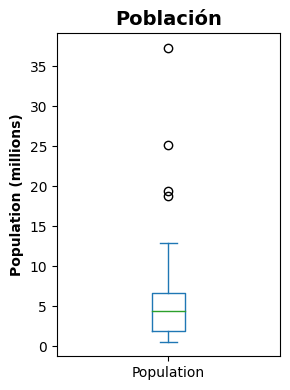

In [ ]:
# Genere un gráfico de caja
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)', fontweight="bold")

plt.title("Población", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## Frequency Table and Histograms
El método `cut` para datos _pandas_ divide el conjunto de datos en contenedores. Hay una serie de argumentos para el método. El siguiente código crea contenedores de igual tamaño. El método `value_counts` devuelve una tabla de frecuencia.

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
# Tabla de frecuencia
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [ ]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

_Pandas_ también admite histogramas para el análisis exploratorio de datos.

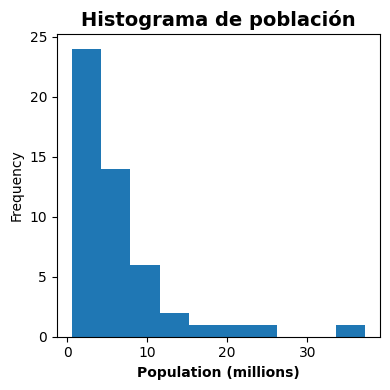

In [ ]:
# Genere un Histograma
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)', fontweight="bold")

plt.title("Histograma de población", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## Density Estimates
La densidad es una alternativa a los histogramas que puede proporcionar más información sobre la distribución de los puntos de datos. Utilice el argumento `bw_method` para controlar la suavidad de la curva de densidad.

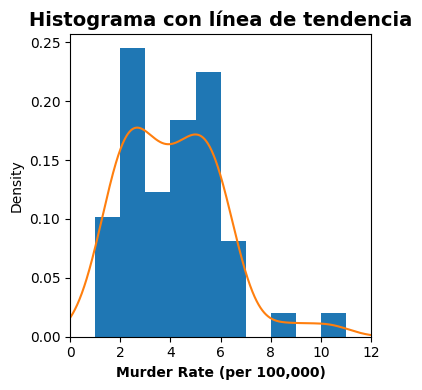

In [ ]:
# Genere un Histograma y la línea de tendencia
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)', fontweight="bold")

plt.title("Histograma con línea de tendencia", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Exploring Binary and Categorical Data

In [ ]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


In [ ]:
dfw.columns

Index(['Carrier', 'ATC', 'Weather', 'Security', 'Inbound'], dtype='object')

In [ ]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


_Pandas_ también admite gráficos de barras para mostrar una sola variable categórica.

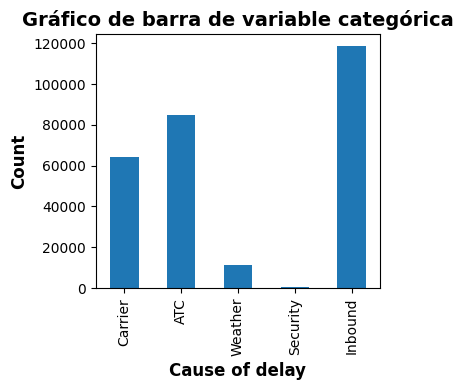

In [ ]:
# Genere un gráfico de barras
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay', fontsize=12, fontweight="bold")
ax.set_ylabel('Count', fontsize=12, fontweight="bold")

plt.title("Gráfico de barra de variable categórica", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

# Correlation
Primera lectura de los datasets

In [ ]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [ ]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


A continuación, nos centramos en los fondos negociados en las principales bolsas (sector == 'etf').

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Debido a la gran cantidad de columnas en esta tabla, mirar la matriz de correlación es engorroso y es más conveniente trazar la correlación como un mapa de calor. El paquete _seaborn_ proporciona una implementación conveniente para los mapas de calor.

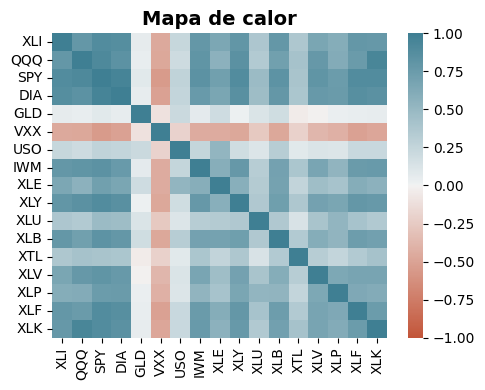

In [ ]:
# Genere un mapa de calor
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.title("Mapa de calor", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## Scatterplots
Los diagramas de dispersión simples son compatibles con _pandas_. Especificar el marcador como `$\u25EF$` usa un círculo abierto para cada punto.

In [ ]:
telecom.columns

Index(['T', 'CTL', 'FTR', 'VZ', 'LVLT'], dtype='object')

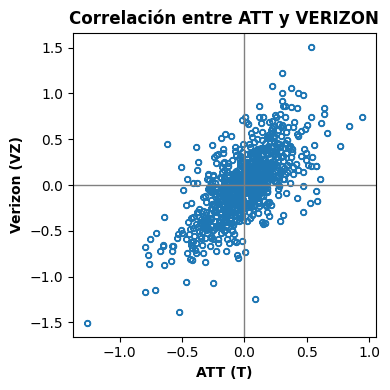

In [ ]:
# Genere un gráfico de Correlación entre ATT vs VERIZON
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)', fontsize=10, fontweight="bold")
ax.set_ylabel('Verizon (VZ)', fontsize=10, fontweight="bold")
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.title("Correlación entre ATT y VERIZON", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

## Two Categorical Variables
Carge el dataset `lc_loans`


In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [ ]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [ ]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## Categorical and Numeric Data
Los diagramas de caja _Pandas_ de una columna se pueden agrupar por una columna diferente.

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


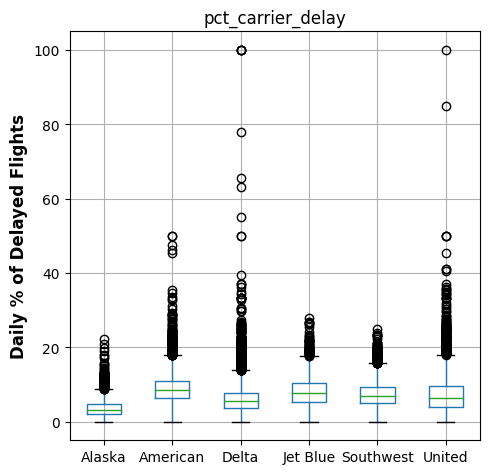

In [ ]:
# Genere un diagrama de caja de pct_carrier_delay para todas las líneas aéreas
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights', fontsize=12, fontweight="bold")
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ también admite una variación de diagramas de caja llamada _violinplot_.

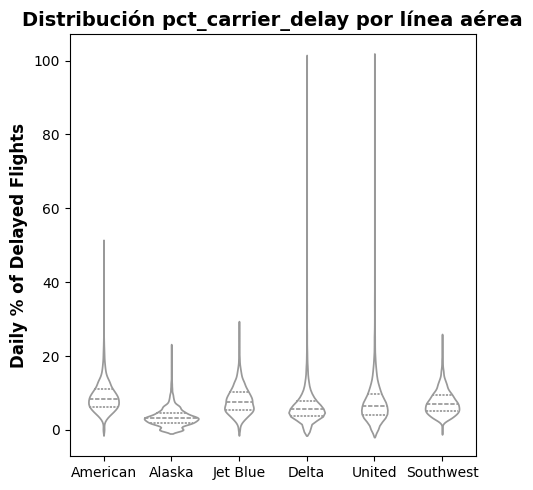

In [ ]:
# Genere un diagrama de violín para los mismos datos
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights', fontsize=12, fontweight="bold")

plt.title("Distribución pct_carrier_delay por línea aérea", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()